<a href="https://colab.research.google.com/github/Loi-Mattia/infoPython/blob/main/VerExplodePie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_json("https://github.com/wtitze/4E/blob/main/comuni_italiani.json?raw=true")
df

,_id,Denominazione in italiano,Provincia,Denominazione Regione,Ripartizione geografica
0,{'$oid': '619f9ec67727bc651542bb9f'},Agliè,Torino,Piemonte,Nord-ovest
1,{'$oid': '619f9ec67727bc651542bba0'},Airasca,Torino,Piemonte,Nord-ovest
2,{'$oid': '619f9ec67727bc651542bba1'},Ala di Stura,Torino,Piemonte,Nord-ovest
3,{'$oid': '619f9ec67727bc651542bba2'},Albiano d'Ivrea,Torino,Piemonte,Nord-ovest
4,{'$oid': '619f9ec67727bc651542bba3'},Almese,Torino,Piemonte,Nord-ovest
...,...,...,...,...,...
7902,{'$oid': '619f9ec67727bc651542da7d'},Villasor,Sud Sardegna,Sardegna,Isole
7903,{'$oid': '619f9ec67727bc651542da7e'},Villaspeciosa,Sud Sardegna,Sardegna,Isole
7904,{'$oid': '619fa3557727bc651542da80'},NaN,Torino,Piemonte,Nord-ovest
7905,{'$oid': '619fa3c57727bc651542da81'},NaN,Gorizia,Friuli-Venezia Giulia,Nord-est


In [ ]:
df.drop(columns="_id",inplace= True)

In [ ]:
df.rename(columns={"Denominazione in italiano": "nome", "Denominazione Regione": "regione","Ripartizione geografica": "area"}, inplace=True)
df

,nome,Provincia,regione,area
0,Agliè,Torino,Piemonte,Nord-ovest
1,Airasca,Torino,Piemonte,Nord-ovest
2,Ala di Stura,Torino,Piemonte,Nord-ovest
3,Albiano d'Ivrea,Torino,Piemonte,Nord-ovest
4,Almese,Torino,Piemonte,Nord-ovest
...,...,...,...,...
7902,Villasor,Sud Sardegna,Sardegna,Isole
7903,Villaspeciosa,Sud Sardegna,Sardegna,Isole
7904,NaN,Torino,Piemonte,Nord-ovest
7905,NaN,Gorizia,Friuli-Venezia Giulia,Nord-est


In [ ]:
if df['nome'].isna().sum() > 0:
  print("ci sono {} comuni senza nome".format(df['nome'].isna().sum()))
  df.dropna(subset=['nome'],inplace= True)
else:
  print("Tutti i comuni hanno un nome")

ci sono 3 comuni senza nome


In [ ]:
df1 = df.copy()
df1 = df1.groupby('area').size().reset_index(name="counts").drop_duplicates()
df1

,area,counts
0,Centro,968
1,Isole,768
2,Nord-est,1390
3,Nord-ovest,2995
4,Sud,1783


In [ ]:
df1.counts

0     968
1     768
2    1390
3    2995
4    1783
Name: counts, dtype: int64

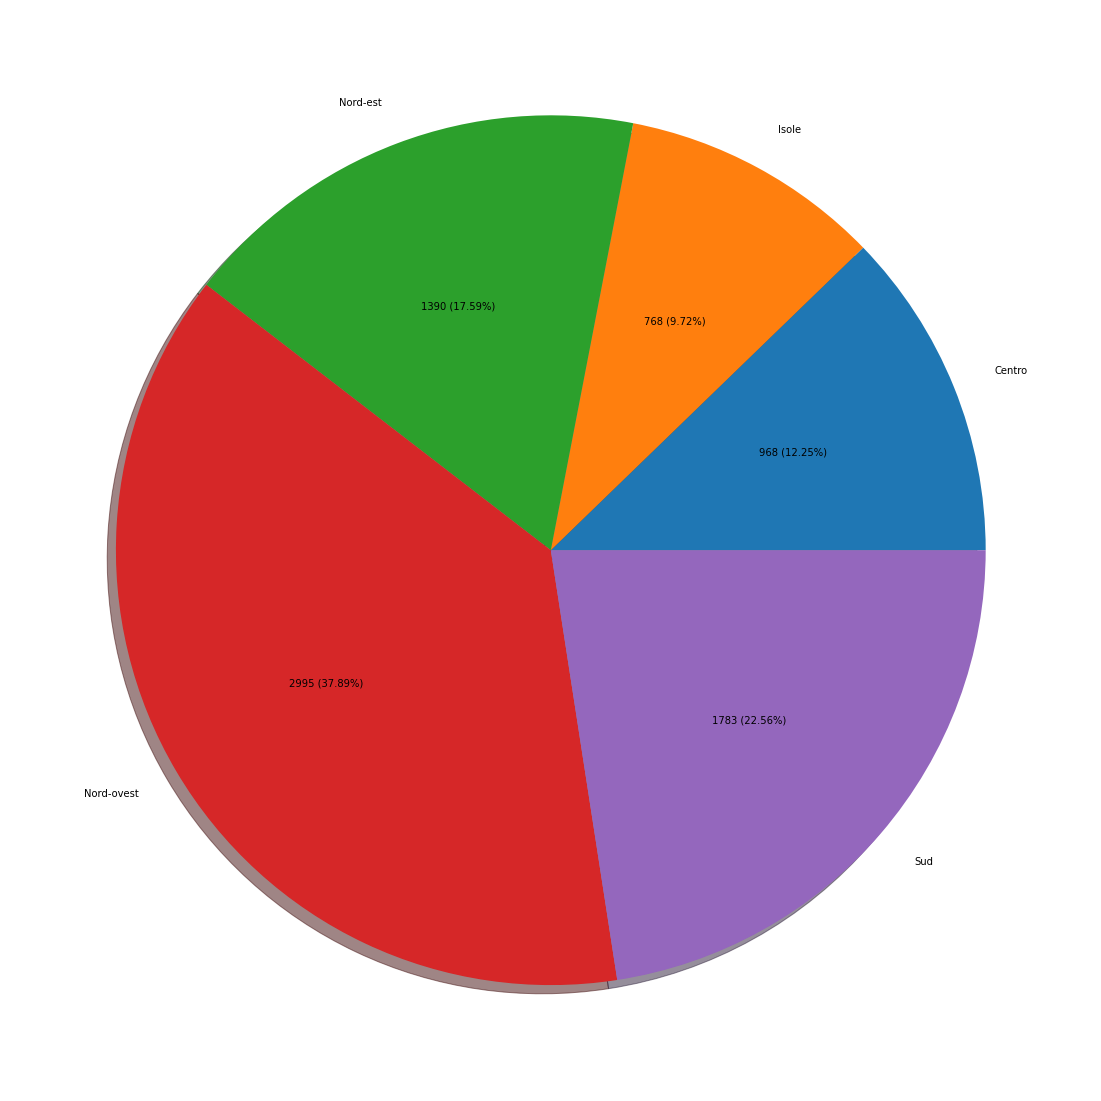

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
ax.pie(df1["counts"], autopct=lambda p:f'{p*sum(df1.counts)/100 :.0f} ({p:.2f}%)',labels=df1["area"],shadow=True)
plt.show()

In [ ]:
df2 = df.copy().drop_duplicates("Provincia")
df2=df2.groupby("regione").count()["nome"].reset_index().rename(columns={"name":"totale"}).set_index("regione")
df2

,nome
regione,
Abruzzo,4
Basilicata,2
Calabria,5
Campania,5
Emilia-Romagna,9
Friuli-Venezia Giulia,4
Lazio,5
Liguria,4
Lombardia,12


In [ ]:
labelsBarH = df2['regione'].value_counts()
utentiBarH = labelsBarH.index
fig, ax = plt.subplots()
ax.barh(utentiBarH,labelsBarH)
ax.grid()
plt.title("c")